## Final Group Project NLP - Part 1

* Ahmed Mohamed Elghamry Shehata
* Ahmed Mahmoud Abdelmoneim Abdelhamid
* Noureldin Mohamed Abdelsalm Mohamed Hamedo
* Sergio Rodrigo Fernandez Testa

## **Downloading the Data**

In [ ]:
!gdown 1lnoaa6tE2gGDQEEz0DW2hvOnjIMK9oTo

Downloading...
From (original): https://drive.google.com/uc?id=1lnoaa6tE2gGDQEEz0DW2hvOnjIMK9oTo
From (redirected): https://drive.google.com/uc?id=1lnoaa6tE2gGDQEEz0DW2hvOnjIMK9oTo&confirm=t&uuid=b9cc5f9f-8c6c-43ec-a611-ec4b88c966a1
To: /content/receipeData.zip
100% 621M/621M [00:11<00:00, 54.3MB/s]


In [ ]:
!unzip /content/receipeData.zip

Archive:  /content/receipeData.zip
   creating: dataset/
  inflating: dataset/full_dataset.csv  


## **Imports**

In [ ]:
import pandas as pd
import re
import ast

## **Loading the Data**

In [ ]:
df=pd.read_csv("/content/dataset/full_dataset.csv", index_col=0)
df

,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
...,...,...,...,...,...,...
2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."


In [ ]:
df = df.dropna()
df

,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
...,...,...,...,...,...,...
2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."


## What is the structure of the dataset?
The dataset contains **2,231,142 rows × 6 columns**, where each row represents a unique recipe. The columns are:

- **title** *(str)*:  
  - Name of the meal.

- **ingredients** *(list of str)*:  
  - List of ingredients used in the recipe.

- **directions** *(list of str)*:  
  - Step-by-step cooking instructions.

- **link** *(str)*:  
  - URL linking to the original recipe source.

- **source** *(ClassLabel)*:  
  - Origin of the recipe, with values:
    - **"Gathered" (0)** – Recipes collected via web scraping from various cooking websites.  
    - **"Recipes1M" (1)** – Recipes from the original **Recipe1M+** dataset.

- **NER** *(list of str)*:  
  - Named food entities extracted using Named Entity Recognition (NER), such as:
    - Ingredients  
    - Quantities  
    - Cooking techniques

## What type of task was the dataset collected for?
The RecipeNLG dataset was collected for the task of semi-structured text generation, specifically:

To enable models to generate coherent and structured cooking recipes from structured inputs (like ingredients, NER tags, etc.).

It supports research in Natural Language Generation (NLG), especially in generating multi-step procedural texts such as recipes.

Although it builds on the Recipe1M+ dataset, RecipeNLG significantly expands it by adding over 1 million new, preprocessed, and deduplicated recipes, enhancing the dataset’s scale and quality for generative tasks.

## What type of task was the dataset collected for?
The dataset contains textual documents, where each document corresponds to a complete cooking recipe. These documents are semi-structured, with fields that blend structured data (like lists of ingredients) and unstructured text (like free-form cooking directions).

## How many documents are there? How long are they on average, and what is their distribution?
The RecipeNLG dataset contains 2,231,142 documents, each representing a unique recipe. In terms of length:

* Ingredients: Recipes include an average of around 8 ingredients, with most falling between 4 and 12. The distribution is slightly right-skewed, as a smaller number of complex recipes can have 20 or more ingredients.

* Directions: Instructional steps vary widely, with most recipes having 5 steps. The average length of the full text (title + ingredients + directions) is typically 100-130 tokens, though this can vary significantly depending on the complexity of the recipe.

* Overall document length distribution tends to follow a long-tail pattern — many recipes are short and simple, but there’s a substantial minority with much longer instructions and detailed components.

This variation makes the dataset suitable for both basic and advanced text modeling tasks, including length-controlled generation or summarization.

Documents analyzed: 2231142
Collection tokens: 283906315
Average total length: 127.25 words
Median total length: 99.0
Std dev of total length: 94.16
Total vocabulary size: 757408
Average vocabulary per document: 85.10

=== Ingredients ===
Mean: 8.73, Median: 8.0, Std: 4.02

=== Directions ===
Mean: 6.61, Median: 5.0, Std: 5.32


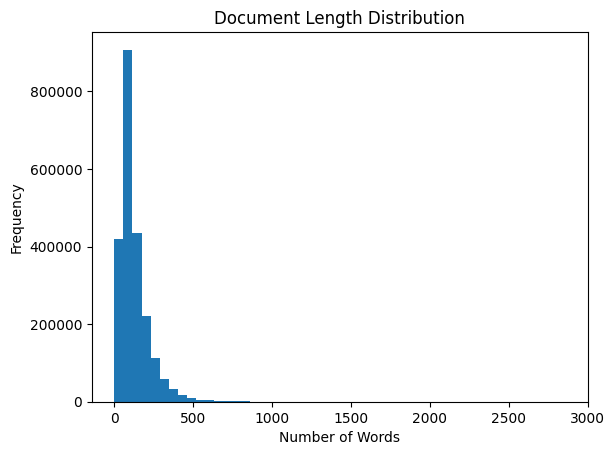

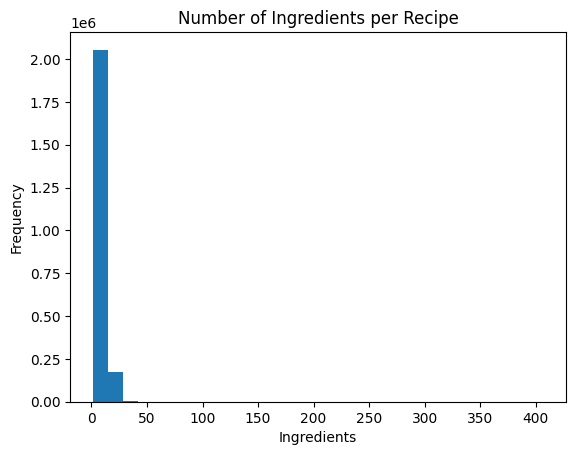

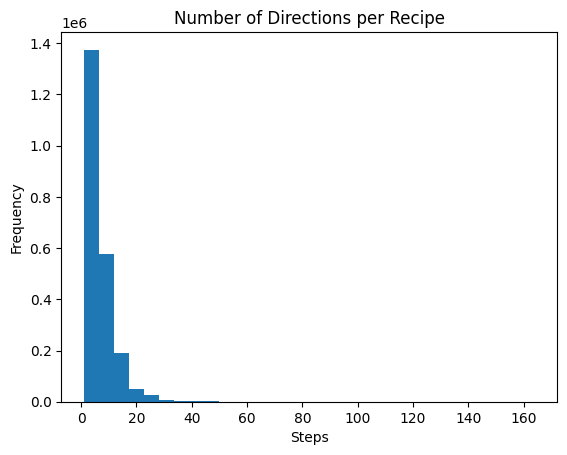

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import ast

# --- Initialize ---
chunk_size = 10000
lengths = []
vocab_counter = Counter()
vocab_per_doc = []

ingredient_counts = []
direction_counts = []

# --- Helper function to parse list-like strings ---
def parse_list(cell):
    try:
        return ast.literal_eval(cell) if isinstance(cell, str) else []
    except:
        return []

# --- Process CSV in chunks ---
for chunk in pd.read_csv("dataset/full_dataset.csv", chunksize=chunk_size):
    # Parse ingredients and directions as lists
    chunk['ingredients_list'] = chunk['ingredients'].apply(parse_list)
    chunk['directions_list'] = chunk['directions'].apply(parse_list)

    # Count items
    chunk['num_ingredients'] = chunk['ingredients_list'].apply(len)
    chunk['num_directions'] = chunk['directions_list'].apply(len)

    # Combine all text
    chunk['full_text'] = chunk['ingredients_list'].apply(lambda x: ' '.join(x)) + ' ' + chunk['directions_list'].apply(lambda x: ' '.join(x))


    for i, text in enumerate(chunk['full_text']):
        tokens_2 = text.split()
        lengths.append(len(tokens_2))

        ingredient_counts.append(chunk['num_ingredients'].iloc[i])
        direction_counts.append(chunk['num_directions'].iloc[i])

# --- Convert to arrays ---
lengths = np.array(lengths)
vocab_per_doc = np.array(vocab_per_doc)
ingredient_counts = np.array(ingredient_counts)
direction_counts = np.array(direction_counts)

# --- Print Summary ---
print(f"Documents analyzed: {len(lengths)}")
print(f"Collection tokens: {sum(lengths)}")
print(f"Average total length: {lengths.mean():.2f} words")
print(f"Median total length: {np.median(lengths)}")
print(f"Std dev of total length: {lengths.std():.2f}")
print(f"Total vocabulary size: {len(vocab_counter)}")
print(f"Average vocabulary per document: {vocab_per_doc.mean():.2f}")

print("\n=== Ingredients ===")
print(f"Mean: {ingredient_counts.mean():.2f}, Median: {np.median(ingredient_counts)}, Std: {ingredient_counts.std():.2f}")

print("\n=== Directions ===")
print(f"Mean: {direction_counts.mean():.2f}, Median: {np.median(direction_counts)}, Std: {direction_counts.std():.2f}")

# --- Plots ---
plt.hist(lengths, bins=50)
plt.title("Document Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

plt.hist(ingredient_counts, bins=30)
plt.title("Number of Ingredients per Recipe")
plt.xlabel("Ingredients")
plt.ylabel("Frequency")
plt.show()

plt.hist(direction_counts, bins=30)
plt.title("Number of Directions per Recipe")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

In [ ]:
tokens = set()

for _, row in df.iterrows():
    for word in row['title'].split():
        word = re.sub(r'\W+', ' ', word.lower()).strip()
        if word:
            tokens.update(word.split())

    for item in row['ingredients'] + row['directions'] + row['NER']:
        for word in item.split():
            word = re.sub(r'\W+', ' ', word.lower()).strip()
            if word:
                tokens.update(word.split())

print("Vocabulary size:", len(tokens))

Vocabulary size: 86609


## How big is the vocabulary of the collection?
That means the vocabulary size of your RecipeNLG dataset is 86609 unique tokens.

In [ ]:
vocab_sizes = []
for _, row in df.iterrows():
    row_tokens = set()

    for word in row['title'].split():
        word = re.sub(r'\W+', ' ', word.lower()).strip()
        if word:
            row_tokens.update(word.split())

    for item in row['ingredients'] + row['directions'] + row['NER']:
        for word in item.split():
            word = re.sub(r'\W+', ' ', word.lower()).strip()
            if word:
                row_tokens.update(word.split())

    vocab_sizes.append(len(row_tokens))

average_vocab_size = sum(vocab_sizes) / len(vocab_sizes) if vocab_sizes else 0
print("Average vocabulary size per document:", average_vocab_size)

Average vocabulary size per document: 32.978339333999955


## How big is the vocabulary of a document on average?
33